# Will McFarland

## Research question/interests
I would like to analyze the librosa data to learn more about how a genre might be able to be identified by the auditory features of a song.

## Task 1 - Exploratory Data Analysis

In [1]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import seaborn as sns

Lets look at tracks first.
Loading the data

In [2]:
tracks = pd.read_csv("../data/raw/tracks.csv", low_memory=False)

What does the data look like at a glance?

In [3]:
tracks.head()

,Unnamed: 0,album,album.1,album.2,album.3,album.4,album.5,album.6,album.7,album.8,...,track.10,track.11,track.12,track.13,track.14,track.15,track.16,track.17,track.18,track.19
0,NaN,comments,date_created,date_released,engineer,favorites,id,information,listens,producer,...,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
1,track_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,4656,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293,NaN,3,NaN,[],Food
3,3,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,1470,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514,NaN,4,NaN,[],Electric Ave
4,5,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,1933,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151,NaN,6,NaN,[],This World


In [4]:
shape = tracks.shape
print(f"The tracks dataset contains {shape[0]} rows and {shape[1]} columns")

The tracks dataset contains 106576 rows and 53 columns


There's quite a few columns in this dataset, but are they? Let's view a list of them all. Unfortunetly the column names are kind of spread between the first 2 rows (i.e. the row pandas assigned to the header and row 0), so lets print those 2 values together for each column.

In [5]:
tracks.iloc[0] # This will print the row header and the vale at row 0 for each column

Unnamed: 0                  NaN
album                  comments
album.1            date_created
album.2           date_released
album.3                engineer
album.4               favorites
album.5                      id
album.6             information
album.7                 listens
album.8                producer
album.9                    tags
album.10                  title
album.11                 tracks
album.12                   type
artist        active_year_begin
artist.1        active_year_end
artist.2      associated_labels
artist.3                    bio
artist.4               comments
artist.5           date_created
artist.6              favorites
artist.7                     id
artist.8               latitude
artist.9               location
artist.10             longitude
artist.11               members
artist.12                  name
artist.13      related_projects
artist.14                  tags
artist.15               website
artist.16        wikipedia_page
set     

We will properly rename all of the columns in the analysis pipeline, but for the purposes of this EDA, lets just look at a few columns and rename them manually. We will also drop rows with missing values here.

In [6]:
track_subset = tracks[['Unnamed: 0', 'track.7', 'artist.12', 'album.2']].rename(columns={'Unnamed: 0': 'track id', 'track.7': 'genre', 'artist.12': 'artist name', 'album.2': 'release date'}).dropna(axis=0, how='any')
track_subset

,track id,genre,artist name,release date
2,2,Hip-Hop,AWOL,2009-01-05 00:00:00
3,3,Hip-Hop,AWOL,2009-01-05 00:00:00
4,5,Hip-Hop,AWOL,2009-01-05 00:00:00
5,10,Pop,Kurt Vile,2008-02-06 00:00:00
11,134,Hip-Hop,AWOL,2009-01-05 00:00:00
...,...,...,...,...
106570,155315,Rock,Spowder,2017-02-17 00:00:00
106571,155316,Rock,Spowder,2017-02-17 00:00:00
106572,155317,Rock,Spowder,2017-02-17 00:00:00
106573,155318,Rock,Spowder,2017-02-17 00:00:00


So we have genre, artist name, and release date. Lets graph it!

Starting with just genre...

<AxesSubplot:>

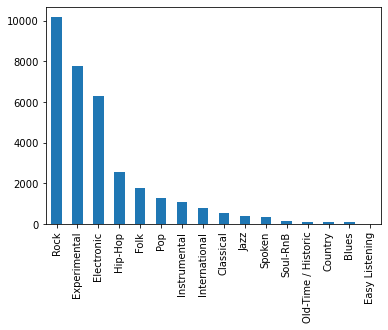

In [7]:
plt.figure()
genre_sizes = track_subset.iloc[:, 1].value_counts()
genre_sizes.plot(kind='bar')

This shows a histogram of number of tracks per genre.

We also have release dates, so let's see genres over time...

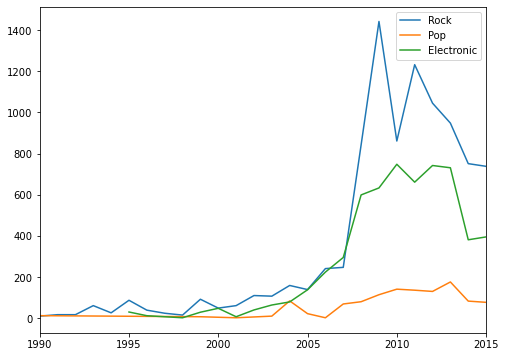

In [8]:
plt.figure(figsize=(8,6))

# Add column that is just year
track_subset['year'] = pd.DatetimeIndex(track_subset['release date']).year

# Get value counts of year and genre together
genres_years = track_subset[['year', 'genre']]
genres_years  = pd.DataFrame(track_subset[['year', 'genre']].value_counts()).reset_index().rename(columns={0: 'count'}).sort_values(['year', 'genre'])

#plt.plot(genres_years.loc[genres_years['genre'] == 'Rock', 'year'], genres_years.loc[genres_years['genre'] == 'Rock', 'count'])
# Plot number of tracks per year by genre
# for g in genres_years['genre'].unique():
for g in ['Rock', 'Pop', 'Electronic']:
    plt.plot(genres_years.loc[genres_years['genre'] == g, 'year'], genres_years.loc[genres_years['genre'] == g, 'count'], label=g)

# Most of our data is between 1990 and 2015
plt.xlim([1990, 2015])

# Show legend
plt.legend()

More than anything this just shows us the distribution of our sample by genre and year. We would need a normalized sample to create an accurate graph of genre distribution over time.


The librosa data is much more abstract. We will dive into this more in the future, but for now lets look at one column that is easy to understand.
Root Mean Square Energy (RMSE) represents the energy of a given cell of audio.
Since the features dataset is so large (), we will just look at a sample of 6000 rows and 1 column.
### TODO enter number of rows and columns for features dataset

In [9]:
rmse = pd.read_csv("../data/raw/features.csv", nrows=6000, skiprows=[0,1,2], usecols=[0, 395])
rmse = rmse.rename(columns={"track_id":"track id", "Unnamed: 395":"rmse_mean"})
track_subset['track id'] = track_subset['track id'].astype(int) # Track ID needs to be int type (it starts as string for some reason)
rmse_meta = pd.merge(track_subset, rmse, on="track id", how="inner") # Combine metadata with RMSE

Text(0, 0.5, 'Mean RMSE')

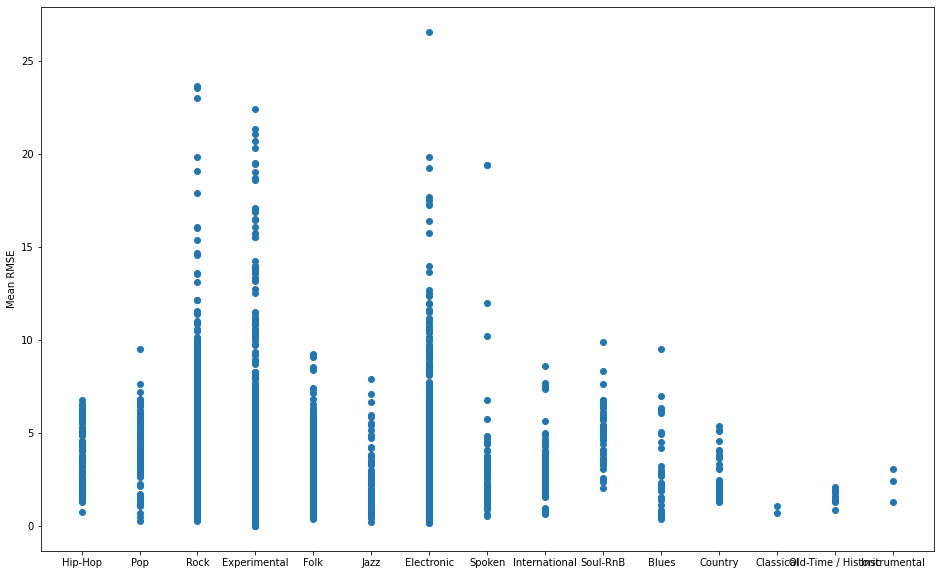

In [10]:
plt.figure(figsize=(16,10))

plt.scatter(rmse_meta['genre'], rmse_meta['rmse_mean'])

plt.ylabel("Mean RMSE")

This shows the average energy levels for tracks by genre.

Another (perhaps more clear) way of visualizing this data is through individual histograms for each genre.

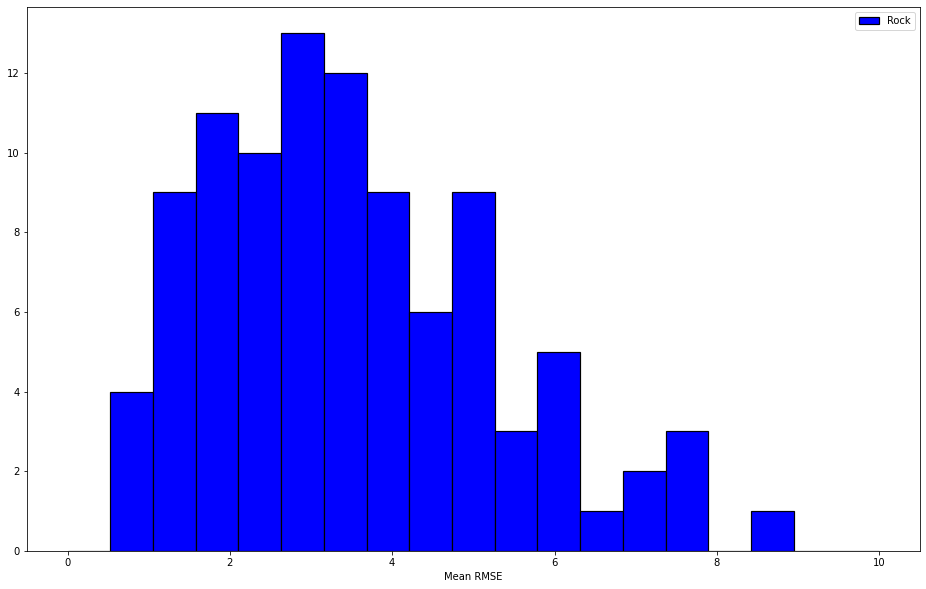

In [11]:
plt.figure(figsize=(16,10))

# Take equally sized samples for 3 genres that exemplify different energies: Rock, Jazz, Electronic
rock = rmse_meta.loc[rmse_meta['genre'] == 'Rock', 'rmse_mean'].head(100)
hiphop = rmse_meta.loc[rmse_meta['genre'] == 'Hip-Hop', 'rmse_mean'].head(100)
spoken = rmse_meta.loc[rmse_meta['genre'] == 'Spoken', 'rmse_mean'].head(100)

bins = np.linspace(0, 10, 20)

plt.hist(rock, bins, label='Rock', color='blue', edgecolor='black', linewidth=1.2)
plt.xlabel('Mean RMSE')
plt.legend()

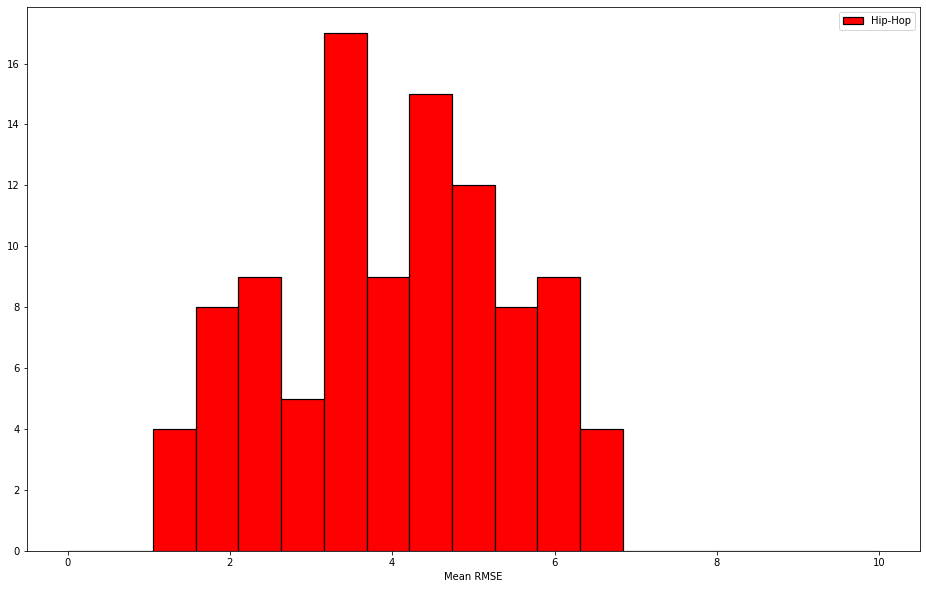

In [12]:
plt.figure(figsize=(16,10))
plt.hist(hiphop, bins, label='Hip-Hop', color='red', edgecolor='black', linewidth=1.2)
plt.xlabel('Mean RMSE')
plt.legend()

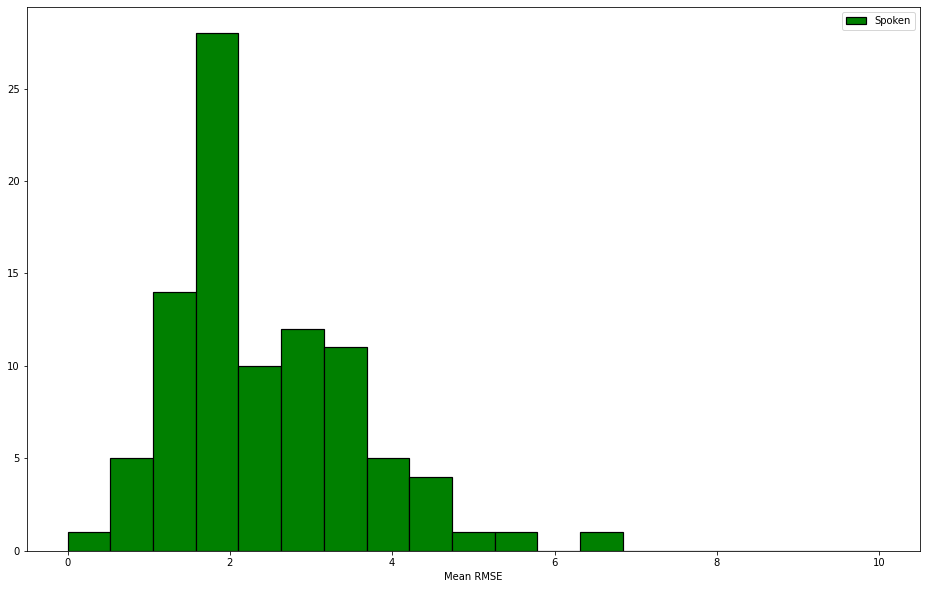

In [13]:
plt.figure(figsize=(16,10))
plt.hist(spoken, bins, label='Spoken', color='green', edgecolor='black', linewidth=1.2)
plt.xlabel('Mean RMSE')
plt.legend()

These histograms do a good job showing how energy changes with different genres. Unfortunetely we don't have any genres that have consistently high energies such as metal, but we do have enough variety to see some trends. For example, rock encompasses a very wide amount of energies (rock ballads vs hard rock for ex.). Comparing this to hip-hop, we see a much more consistent level of energy due to the more narrow variety of energies encompassed in that genre (at least in the sample tracks in this dataset). Spoken-word audio makes for a good benchmark as we expect that to be consistently low-energy, which we see in the final histogram.

## Task 2 - Analysis Pipeline - Tracks

### Tracks metadata

Tracks data starts on row 4, and the first 2 rows should be combined to form the column names. We will also remove rows with null values and select only columns that are likely to use.

In [14]:
# Load the data
tracks = pd.read_csv("../data/raw/tracks.csv", low_memory=False)
for i in range(0, len(tracks.columns)):
    # Remove dot and number at end of original name
    orig = re.sub('[\\.][0-9]*', '', tracks.columns[i]) # Use a regex to remove dot followed by any number of numeric digits
    tracks.columns.values[i] = orig + ' ' + str(tracks.iloc[0,i]) # Append specific name (first column after names) to orig 

# Now remove first 2 rows after column titles
tracks = tracks.drop([0, 1])

# Rename first unnamed column to id
tracks.columns.values[0] = 'id'

tracks.head()

,id,album comments,album date_created,album date_released,album engineer,album favorites,album id,album information,album listens,album producer,...,track information,track interest,track language_code,track license,track listens,track lyricist,track number,track publisher,track tags,track title
2,2,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,4656,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293,NaN,3,NaN,[],Food
3,3,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,1470,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514,NaN,4,NaN,[],Electric Ave
4,5,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,1933,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151,NaN,6,NaN,[],This World
5,10,0,2008-11-26 01:45:08,2008-02-06 00:00:00,NaN,4,6,NaN,47632,NaN,...,NaN,54881,en,Attribution-NonCommercial-NoDerivatives (aka M...,50135,NaN,1,NaN,[],Freeway
6,20,0,2008-11-26 01:45:05,2009-01-06 00:00:00,NaN,2,4,"<p> ""spiritual songs"" from Nicky Cook</p>",2710,NaN,...,NaN,978,en,Attribution-NonCommercial-NoDerivatives (aka M...,361,NaN,3,NaN,[],Spiritual Level


In [15]:
tracks = tracks[['id', 'track title', 'artist name', 'album title', 'track genre_top']]

In [16]:
tracks

,id,track title,artist name,album title,track genre_top
2,2,Food,AWOL,AWOL - A Way Of Life,Hip-Hop
3,3,Electric Ave,AWOL,AWOL - A Way Of Life,Hip-Hop
4,5,This World,AWOL,AWOL - A Way Of Life,Hip-Hop
5,10,Freeway,Kurt Vile,Constant Hitmaker,Pop
6,20,Spiritual Level,Nicky Cook,Niris,NaN
...,...,...,...,...,...
106571,155316,The Auger,Spowder,"Live at Monty Hall, 2/17/2017",Rock
106572,155317,Let's Skin Ruby,Spowder,"Live at Monty Hall, 2/17/2017",Rock
106573,155318,My House Smells Like Kim Deal/Pulp,Spowder,"Live at Monty Hall, 2/17/2017",Rock
106574,155319,The Man With Two Mouths,Spowder,"Live at Monty Hall, 2/17/2017",Rock


### Librosa Data
Like in the EDA, we will use just a small sample of rows from this dataset and just one column.
In a third dataframe we will combine the tracks metadata and the rmse data.

In [18]:
rmse = pd.read_csv("../data/raw/features.csv", nrows=6000, skiprows=[0,1,2], usecols=[0, 395])
rmse = rmse.rename(columns={"track_id":"track id", "Unnamed: 395":"rmse_mean"})
track_subset['track id'] = track_subset['track id'].astype(int) # Track ID needs to be int type (it starts as string for some reason)
rmse_meta = pd.merge(track_subset, rmse, on="track id", how="inner") # Combine metadata with RMSE
rmse_meta

,track id,genre,artist name,release date,year,rmse_mean
0,2,Hip-Hop,AWOL,2009-01-05 00:00:00,2009,3.188761
1,3,Hip-Hop,AWOL,2009-01-05 00:00:00,2009,3.607359
2,5,Hip-Hop,AWOL,2009-01-05 00:00:00,2009,3.251386
3,10,Pop,Kurt Vile,2008-02-06 00:00:00,2008,3.893810
4,134,Hip-Hop,AWOL,2009-01-05 00:00:00,2009,3.310689
...,...,...,...,...,...,...
3816,11019,Experimental,Lucky Dragons,2008-07-01 00:00:00,2008,4.932507
3817,11020,Experimental,Lucky Dragons,2008-07-01 00:00:00,2008,3.130701
3818,11039,Rock,Farmer's Boulevard,2006-04-13 00:00:00,2006,7.073012
3819,11040,Rock,Farmer's Boulevard,2006-04-13 00:00:00,2006,6.547755


The rmse_meta dataframe contains all of our selected data, so all analyses may be done based on this dataframe.